In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# 2023-11-06

filenames =['23-10-30-16-26.data',
                   '23-11-01-15-22.data',
                   '23-11-05-13-25.data']

In [3]:
# import data

decaytime = []
unixtime = []
for i in filenames:
    decaytime_help, unixtime_help = np.genfromtxt(
        i, unpack=True, delimiter=' '
    )
    decaytime.append(decaytime_help)
    unixtime.append(unixtime_help)

decaytime = np.concatenate(decaytime)
unixtime = np.concatenate(unixtime)

In [4]:
# delete false events,
# i.e. data where decaytime > 40000
# but we will do 30000 since there seems to be 
# a number of events from 30000-40000

unixtime = np.delete(unixtime, np.where(decaytime >= 30000))
decaytime = np.delete(decaytime, np.where(decaytime >= 30000))

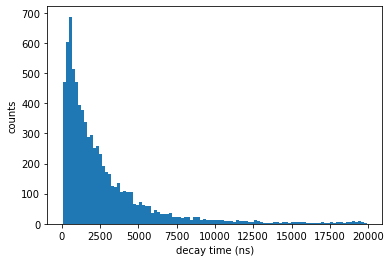

In [5]:
plt.hist(decaytime, bins=100)
plt.xlabel('decay time (ns)')
plt.ylabel('counts')
plt.show()

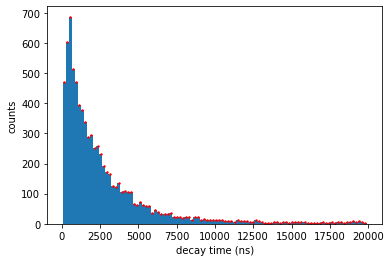

In [6]:
counts, bins, bars = plt.hist(decaytime, bins=100)

# get bin centers

bin_centers = np.array([
    (bins[i] + bins[i + 1])/2
    for i in range(len(bins) - 1)
])

plt.scatter(
    bin_centers, counts,
    color='red',
    s=2
)

plt.xlabel('decay time (ns)')
plt.ylabel('counts')
plt.show()

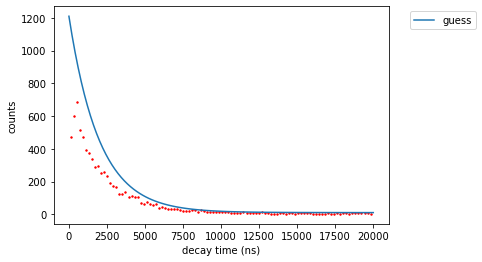

In [7]:
# define fit fcn
# we r gonna fit to an exponential decay

def fcn(t, tau, c1, c2):
    return c1*np.exp(-(1/tau)*t) + c2

# try to make a good guess

tau = 2000
c1 = 1200
c2 = 10
guess = np.array([tau, c1, c2])

# plt.hist(decaytime, bins=100)

plt.scatter(
    bin_centers, counts,
    color='red',
    s=2
)

x = np.linspace(0, 20000, 100)
plt.plot(
    x, fcn(x, *guess),
    label='guess'
)

plt.xlabel('decay time (ns)')
plt.ylabel('counts')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [8]:
# do the fit
# gonna offset where the fit starts
# since the data is weird at the beginning
# due to flashbang effect or whateva

i = 3
popt, pcov = curve_fit(fcn, bin_centers[i:], counts[i:], guess)

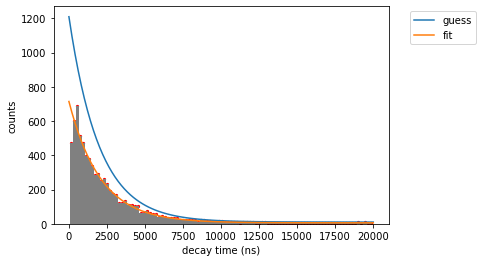

2067.581930220061


In [10]:
# plot everything
plt.scatter(
    bin_centers, counts,
    color='red',
    s=5
)

x = np.linspace(0, 20000, 100)
plt.plot(
    x, fcn(x, *guess),
    label='guess'
)

plt.plot(
    x, fcn(x, *popt),
    label='fit'
)

plt.hist(decaytime, bins=100, color='gray')

plt.xlabel('decay time (ns)')
plt.ylabel('counts')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()
print(popt[0])

In [12]:
Muon_Decay_Output = f"""
{'-'*42}
| The Calculated Muon Lifetime is:
|    {popt[0]} nano-seconds
|   
|      or 
|    {popt[0]/1e3} micro-seconds
{'-'*42}
"""
print(Muon_Decay_Output)


------------------------------------------
| The Calculated Muon Lifetime is:
|    2067.581930220061 nano-seconds
|   
|      or 
|    2.067581930220061 micro-seconds
------------------------------------------

